In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./heart.csv")


In [3]:
df=df.rename(columns={"cp":"chest_paintype","fbs":"fasting_blood_sugar"})


In [4]:

df.head()

,age,sex,chest_paintype,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,chest_paintype,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['age'][df['target']==1].head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
df.groupby(["chest_paintype"]).max()

,age,sex,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
chest_paintype,,,,,,,,,,,,,
0,77,1,200,409,1,2,186,1,6.2,2,4,3,1
1,74,1,192,342,1,1,202,1,1.8,2,4,3,1
2,76,1,180,564,1,2,194,1,3.6,2,4,3,1
3,69,1,178,298,1,1,190,1,4.2,2,2,3,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

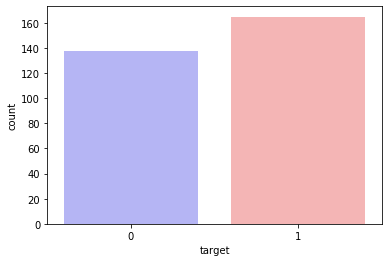

In [10]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [11]:
temp=df[["sex","chol"]]

In [12]:
temp

,sex,chol
0,1,233
1,1,250
2,0,204
3,1,236
4,0,354
...,...,...
298,0,241
299,1,264
300,1,193
301,1,131


# Scatter

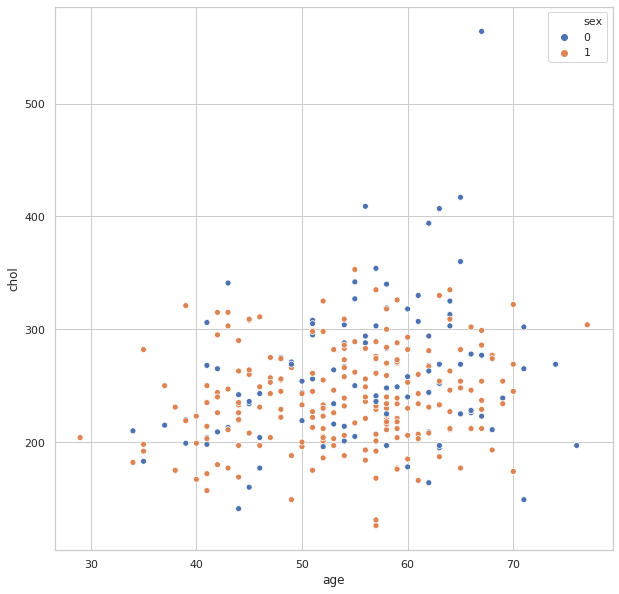

In [13]:
sns.set(style='whitegrid')

# plt.rcParams['xtick.markers']=
plt.rcParams['figure.figsize']=10,10

xyz=sns.scatterplot(data=df,x="age",y="chol",hue="sex",ci=False)


# LINE PLOT: (for concept sake)  #ignore this

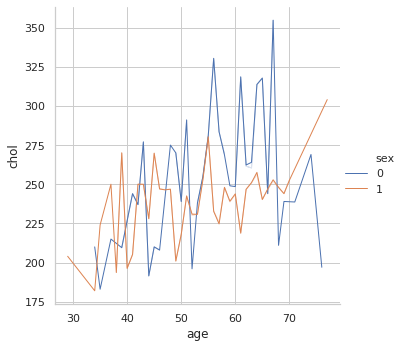

In [14]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=1,10
plt.rcParams['lines.linewidth']=1
sns.relplot(data=df,x="age",y="chol",kind="line",hue="sex",ci=False)

# catplot
chestpaintype vs age

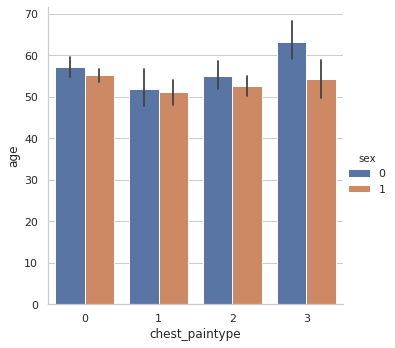

In [15]:
g=sns.catplot(x="chest_paintype",y="age",hue="sex",kind="bar",data=df)


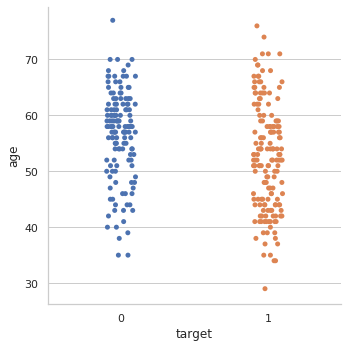

In [16]:
plt.rcParams['figure.figsize']=100,100
g=sns.catplot(x="target",y="age",data=df)


# violin plot

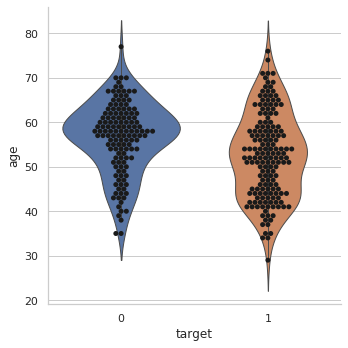

In [17]:
plt.rcParams['figure.figsize']=100,100

g=sns.catplot(x="target",y="age",data=df,kind="violin")
g=sns.swarmplot(x="target",y="age",data=df,color="k")

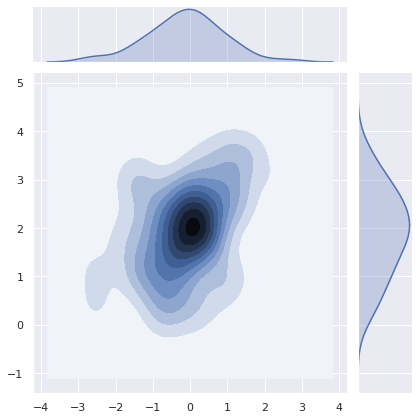

In [18]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
plt.rcParams['figure.figsize']=10,10

ax = sns.jointplot(x,y,kind="kde")

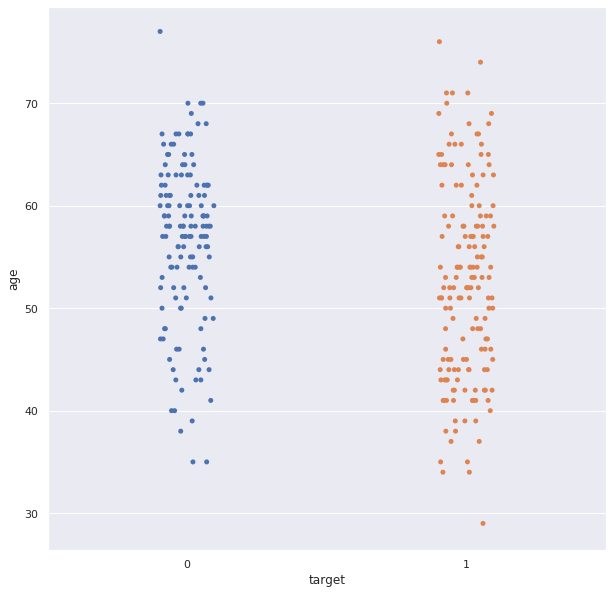

In [19]:
plt.rcParams['figure.figsize']=10,10
g=sns.stripplot(x="target",y="age",data=df,jitter=True)

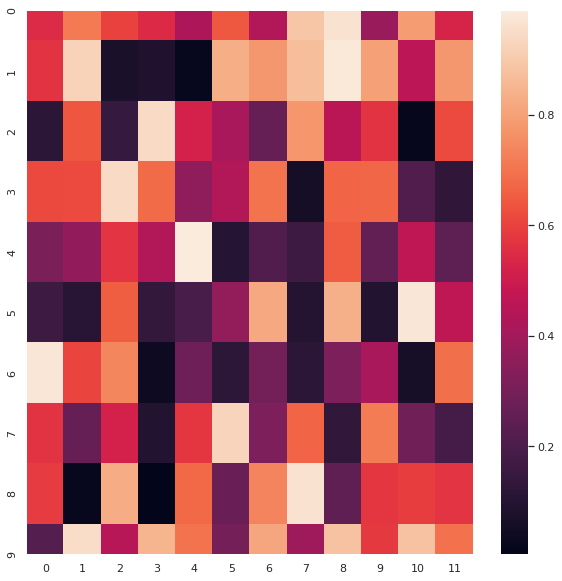

In [20]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [21]:
k=df.loc[:,'sex':'chol']


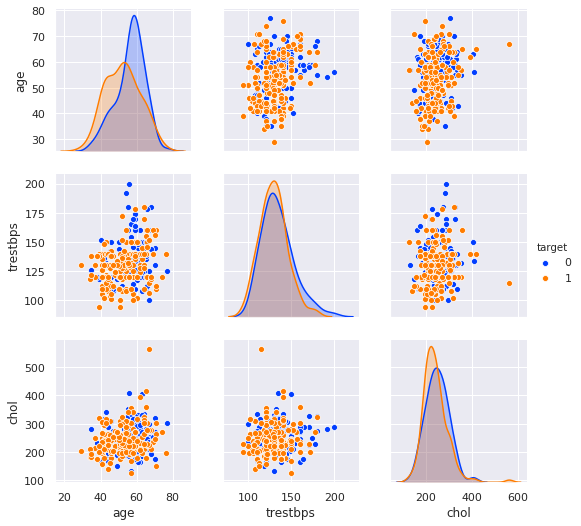

In [83]:
sns.pairplot(df,vars=['age','trestbps','chol'],palette=sns.color_palette("bright", 10),hue="target")

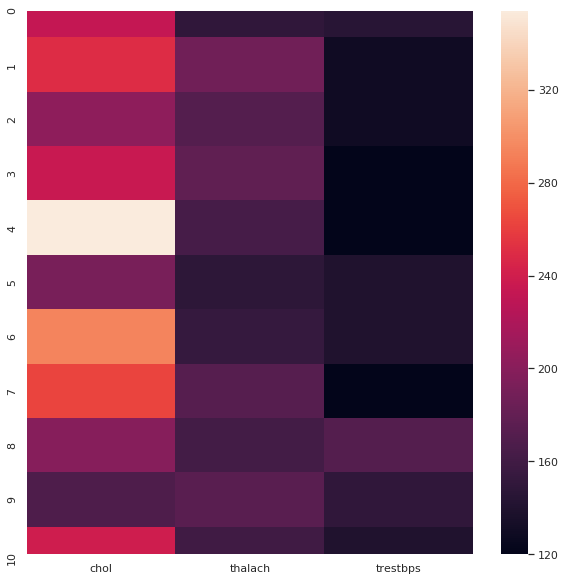

In [23]:
k=df.loc[0:10,['chol','thalach','trestbps']]
sns.heatmap(k)

In [84]:
X=df.iloc[:,:13]
Y=df.iloc[:,13]


SPLIT SET


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=400)

FEATURE SCALING

In [42]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [95]:
from sklearn import svm
cf=svm.SVC(gamma="scale",kernel="linear",degree=7,random_state=0)
cf.fit(X,Y)

#print(Y_test)
#probs[:,1]
probs.size
i=0
#probs=probs[:,1]

    

In [90]:

z=cf.predict(X_test)
cf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
from sklearn import linear_model
from sklearn import svm
model=linear_model.LogisticRegression(solver='lbfgs')
r=model.fit(X_train,Y_train)

In [104]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cf, X_test, Y_test, cv = 10)
print(cf.score(X_train,Y_train)*100)

67.76859504132231
